In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

In [13]:
# Parameter
test_dir = "D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/dataset/hsv_dataset/test"
batch_size = 64  
IMG_SIZE = (300, 300)
folds = 3  

# Import data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 300 images belonging to 3 classes.


In [ ]:
# Initialize lists to store metrics
all_test_accuracies = []
conf_matrices = []
histories = []

c:\Users\CATUR WARGA COMPUTER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.8727 - loss: 0.9897 - precision_1: 0.8722 - recall_1: 0.8688
Fold 1 - Test Accuracy: 0.7599999904632568
Fold 1 - Test Loss: 1.9235070943832397
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step
              precision    recall  f1-score   support

     Manggis       1.00      0.95      0.97       100
      Pisang       0.58      1.00      0.74       100
    Rambutan       0.97      0.33      0.49       100

    accuracy                           0.76       300
   macro avg       0.85      0.76      0.73       300
weighted avg       0.85      0.76      0.73       300

Metrics for Fold 1
      Class   TP  FN  FP   TN
0   Manggis   95   5   0  200
1    Pisang  100   0  71  129
2  Rambutan   33  67   1  199


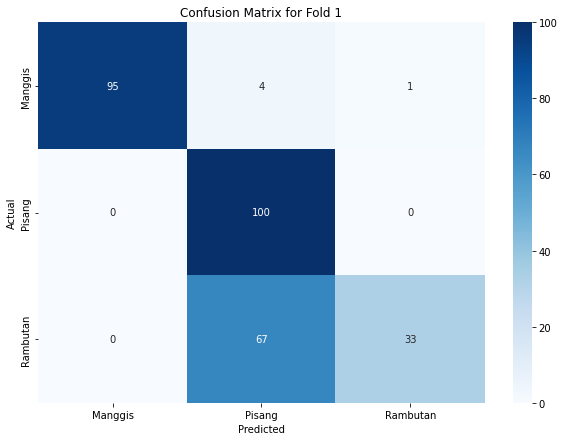

5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9300 - loss: 0.2296 - precision_2: 0.9434 - recall_2: 0.9274
Fold 2 - Test Accuracy: 0.9333333373069763
Fold 2 - Test Loss: 0.23125557601451874
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step
              precision    recall  f1-score   support

     Manggis       1.00      0.96      0.98       100
      Pisang       0.92      0.88      0.90       100
    Rambutan       0.89      0.96      0.92       100

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300

Metrics for Fold 2
      Class  TP  FN  FP   TN
0   Manggis  96   4   0  200
1    Pisang  88  12   8  192
2  Rambutan  96   4  12  188


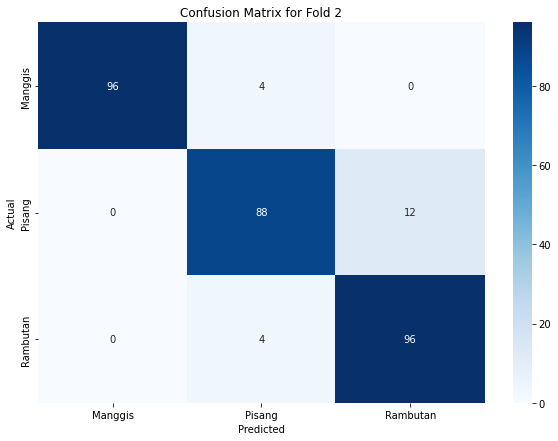

5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9321 - loss: 0.2296 - precision_3: 0.9319 - recall_3: 0.9295
Fold 3 - Test Accuracy: 0.9200000166893005
Fold 3 - Test Loss: 0.24975349009037018
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step
              precision    recall  f1-score   support

     Manggis       0.99      0.98      0.98       100
      Pisang       0.91      0.86      0.89       100
    Rambutan       0.86      0.92      0.89       100

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

Metrics for Fold 3
      Class  TP  FN  FP   TN
0   Manggis  98   2   1  199
1    Pisang  86  14   8  192
2  Rambutan  92   8  15  185


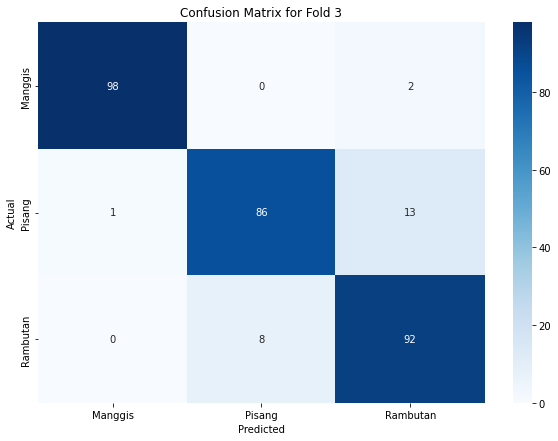

In [ ]:
for fold in range(1, folds + 1):
    # Load model
    model_path = f"D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/models/K-Fold Cross Validation/ResNet50-RGB_fold_{fold}.h5"
    model = load_model(model_path)

    # Evaluate the model using the test data
    test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_generator)
    all_test_accuracies.append(test_accuracy)

    print(f"Fold {fold} - Test Accuracy: {test_accuracy}")
    print(f"Fold {fold} - Test Loss: {test_loss}")

    # Predictions
    test_generator.reset()
    predictions = model.predict(test_generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    conf_matrices.append(cm)

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
    print(report)

    # Save history
    histories.append(model.history.history)

    # Calculate TP, FN, TN, FP
    TP = np.diag(cm)
    FN = np.sum(cm, axis=1) - TP
    FP = np.sum(cm, axis=0) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    metrics_df = pd.DataFrame({
        'Class': test_generator.class_indices.keys(),
        'TP': TP,
        'FN': FN,
        'FP': FP,
        'TN': TN
    })
    
    print(f"Metrics for Fold {fold}")
    print(metrics_df)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.show()

    
    
    

In [ ]:
# Average test accuracy
average_test_accuracy = np.mean(all_test_accuracies)
print(f"\nAverage Test Accuracy: {average_test_accuracy}")


Average Test Accuracy: 0.8711111148198446
